<a href="https://colab.research.google.com/github/luismanriqueruiz/machine_learning/blob/main/object_detection/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reference**:

* https://medium.com/analytics-vidhya/tensorflow-2-object-detection-api-using-custom-dataset-745f30278446
* https://www.youtube.com/watch?v=XoMiveY_1Z4&t=1507s


## Step1 : Setup for TensorFlow2 Object Detection API

In [28]:
# Check libcudnn8 version
!apt-cache policy libcudnn8

# Install latest version
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

# Export env variables
!export PATH=/usr/local/cuda-11.4/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/lib64:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/include:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

libcudnn8:
  Installed: 8.0.5.39-1+cuda11.1
  Candidate: 8.5.0.96-1+cuda11.7
  Version table:
     8.5.0.96-1+cuda11.7 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.5.0.96-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.1.50-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.1.50-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda11.5 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda10.2

In [1]:
!pip install tf-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584.5 MB 4.6 kB/s 
     |████████████████████████████████| 1.7 MB 50.1 MB/s 
     |████████████████████████████████| 439 kB 67.9 MB/s 
     |████████████████████████████████| 5.9 MB 56.7 MB/s 
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3


In [2]:
import os
from glob2 import glob
import pathlib

In [3]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 76706, done.
remote: Counting objects: 100% (527/527), done.
remote: Compressing objects: 100% (291/291), done.
remote: Total 76706 (delta 269), reused 458 (delta 231), pack-reused 76179
Receiving objects: 100% (76706/76706), 596.86 MiB | 16.67 MiB/s, done.
Resolving deltas: 100% (54356/54356), done.


In [4]:
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1695009 sha256=5ee90a2417bef1fc0d0ead6dd4c70630f46b5d1c3eb1b7e4f42e5be761cf77de
  Stored in directory: /tmp/pip-ephem-wheel-cache-fbbysju7/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=4e7b096fb2f614532bbc18234a6743cd54052fa0833171955e6285f68b8a25b3
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=a0c3bccfc4fb7840f168f647b011f435375127e08d868b4efc408c4991667d63
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for avro-python3: filename=avro_p

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-nightly 2.11.0.dev20220903 requires flatbuffers>=2.0, but you have flatbuffers 1.12 which is incompatible.


In [6]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 16.42 MiB/s, done.
Resolving deltas: 100% (576/576), done.


## Step 2: Set up the directory structure for the Custom dataset

In [ ]:
!cd /content/drive/MyDrive/research/custom_dataset_object_detection

In [ ]:
os.getcwd()

'/content'

In [ ]:
!unzip /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/archive.zip -d /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od

Archive:  /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/archive.zip
  inflating: /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annots/00001.xml  
  inflating: /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annots/00002.xml  
  inflating: /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annots/00003.xml  
  inflating: /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annots/00004.xml  
  inflating: /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annots/00005.xml  
  inflating: /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annots/00006.xml  
  inflating: /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annots/00007.xml  
  inflating: /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annots/00009.xml  
  inflating: /content/drive/MyDrive/research/custom_data

In [7]:
round(183 * .7,0)

128.0

In [8]:
glob('/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/*.*')

['/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00044.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00030.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00016.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00072.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00073.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00040.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00017.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00065.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00039.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00

In [34]:
## To check if the Jpeg are good
from skimage import io
import cv2
files=[]
files=glob('/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/*.jpg')
for i in range(len(files)):
  try:
    _ = io.imread(files[i])
    img = cv2.imread(files[i])

  except Exception as e:
    print(e)
    print(files[i])

In [33]:
## To check if the Jpeg are good
from skimage import io
import cv2
files=[]
files=glob('/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/test/*.jpg')
for i in range(len(files)):
  try:
    _ = io.imread(files[i])
    img = cv2.imread(files[i])

  except Exception as e:
    print(e)
    print(files[i])

## Step 3: Create a Label Map file

In [9]:
glob('/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/*')

['/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/label_map.pbtxt',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/train.record',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/test.record']

## Step 4: Prepare the Custom Dataset

In [10]:
glob('/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/*/*.*')

['/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00044.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00030.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00016.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00072.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00073.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00040.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00017.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00065.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00039.xml',
 '/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train/00

### Creating TFRecord based on the annotated XML file

In [35]:
# importing required libraraies
import os
import glob
import pandas as pd
import io
import xml.etree.ElementTree as ET
import argparse
import tensorflow.compat.v1 as tf
from PIL import Image
from object_detection.utils import dataset_util, label_map_util
from collections import namedtuple

# Set the folder name for the source annotated XML files and folder #to store the TFRecord Record file
LABEL_MAP_FILE=r'/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/label_map.pbtxt'
TRAIN_XML_FILE=r'/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/train'
TRAIN_TF_RECORD_DIR=r'/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/train.record'
TEST_XML_FILE=r'/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/test'
TEST_TF_RECORD_DIR=r'/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/test.record'

#Create a dictionary for the labels  or objects
label_map = label_map_util.load_labelmap(LABEL_MAP_FILE)
label_map_dict = label_map_util.get_label_map_dict(label_map)

#convert the object annotation from XML file to a dataframe
def xml_to_df(path):
  """Iterates through all .xml files conatining Annotation in a given directory and combines
  them in a single Pandas dataframe.
  Parameters:
  ----------
  path : str
      The path containing the .xml files
  Returns
  -------
  Pandas DataFrame
      The produced dataframe
  """
  xml_list = []
  for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
      value = (root.find('filename').text,
                int(root.find('size')[0].text),
                int(root.find('size')[1].text),
                member[0].text,
                int(member[4][0].text),
                int(member[4][1].text),
                int(member[4][2].text),
                int(member[4][3].text)
                )
      xml_list.append(value)
  column_name = ['filename', 'width', 'height',
                  'class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(xml_list, columns=column_name)
  return xml_df

#pass the label and get its equivalent integer
def class_label_to_int(row_label):
    return label_map_dict[row_label]

#Split filename and the annotations details for all the xml files
def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

# Create the TF Record files
def create_tf_example(group, path):
    with tf.io.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_label_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example


In [36]:
# training
df_train = xml_to_df(TRAIN_XML_FILE)
grouped_train = split(df_train, 'filename')

In [37]:
#Generating the train TFRecord
writer = tf.python_io.TFRecordWriter(TRAIN_TF_RECORD_DIR)
#grouped_train = 'train'
for group in grouped_train:
  tf_example = create_tf_example(group, TRAIN_XML_FILE)
  writer.write(tf_example.SerializeToString())
writer.close()
print('Successfully created the TFRecord file: {}'.format(TRAIN_TF_RECORD_DIR))

Successfully created the TFRecord file: /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/train.record


In [ ]:
# testing
df_test = xml_to_df(TEST_XML_FILE)
grouped_test = split(df_test, 'filename')

In [ ]:
# Generating the test TFRecord 
writer = tf.python_io.TFRecordWriter(TEST_TF_RECORD_DIR)
#grouped_test = 'test'
for group in grouped_test:
  tf_example = create_tf_example(group, TEST_XML_FILE)
  writer.write(tf_example.SerializeToString())
writer.close()
print('Successfully created the TFRecord file: {}'.format(TEST_TF_RECORD_DIR))

## Step 5: Download the Pretrained Models

In [ ]:
%%bash
cd /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/pretrained_models
wget 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'

In [ ]:
%%bash
cd /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/pretrained_models
tar -xvzf ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

## Step 6: Configuring the Training Pipeline by updating the pipeline.config

```
model {
  ssd {
    num_classes: 1
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
}


train_config {
  batch_size: 6
  data_augmentation_options {
    random_horizontal_flip {
    }
  }


fine_tune_checkpoint: "/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/pretrained_models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0"
num_steps: 300000
startup_delay_steps: 0.0
replicas_to_aggregate: 8
max_number_of_boxes: 100
unpad_groundtruth_tensors: false
fine_tune_checkpoint_type: "detection"
use_bfloat16: true
fine_tune_checkpoint_version: V2




train_input_reader {
  label_map_path: "/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/label_map.pbtxt"
  tf_record_input_reader {
    input_path: "/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/train.record"
  }
}



eval_input_reader {
  label_map_path: "/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/label_map.pbtxt"
  shuffle: false
  num_epochs: 1
  tf_record_input_reader {
    input_path: "/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/test.record"
  }
}
```

## Step 7: Training the Object detection model on the custom dataset


copying file model_main_tf2.py into custom_od

In [25]:
%cd /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od
!pwd


/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od
/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od


In [38]:
!python model_main_tf2.py --model_dir=/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/pretrained_models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8 --pipeline_config_path=/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/pretrained_models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config

2022-09-04 03:00:18.574667: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0904 03:00:18.582648 139906506053504 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0904 03:00:18.588478 139906506053504 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0904 03:00:18.588634 139906506053504 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0904 03:00:18.613722 139906506053504 deprecation.py:356] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experimental

## Monitoring the Object Detection Training

In [44]:
#%load_ext tensorboard
#%reload_ext tensorboard
#%tensorboard --logdir /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/pretrained_models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8

## Exporting the Trained Model

In [51]:
%cd /content/models/research/object_detection
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/pretrained_models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config --trained_checkpoint_dir /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/pretrained_models/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/ --output_directory /content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/exported_model


/content/models/research/object_detection
2022-09-04 03:49:41.292906: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0904 03:49:41.552590 140310880425856 deprecation.py:628] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, e

## Making Inferences Using the Trained Object Detection Model

Loading model...Done! Took 13.485524892807007 seconds
Done


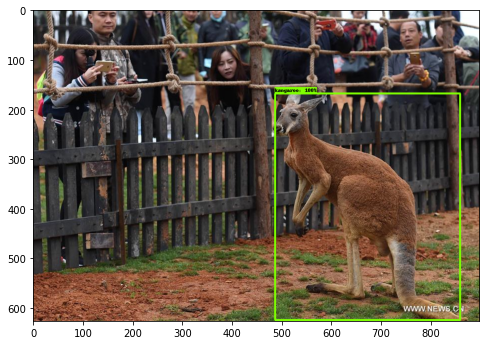

In [53]:
#Import the required libraries for Object detection infernece
import time
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# setting min confidence threshold
MIN_CONF_THRESH=.6
#Loading the exported model from saved_model directory
PATH_TO_SAVED_MODEL =r'/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/exported_model/saved_model'
print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)
end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))
# LOAD LABEL MAP DATA
PATH_TO_LABELS=r'/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/annotations/label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,                                                                    use_display_name=True)

#Image file for inference
IMAGE_PATH=r'/content/drive/MyDrive/research/custom_dataset_object_detection/custom_od/images/test/00132.jpg'
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array of shape (height, width, channels), where channels=3 for RGB to feed into tensorflow graph.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))

image_np = load_image_into_numpy_array(IMAGE_PATH)
# Running the infernce on the image specified in the  image path
# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections
# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
#print(detections['detection_classes'])
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=MIN_CONF_THRESH,
      agnostic_mode=False)

plt.figure(figsize=(8, 12))
plt.imshow(image_np_with_detections)
print('Done')
plt.show()